用CNN預測

In [1]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical # 做one-hot encoding用
from tensorflow.keras.models import Sequential # 建模型 
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D # 卷積層
from tensorflow.keras.preprocessing.image import ImageDataGenerator #做資料集擴張
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #splitting dataset

In [2]:
train_set=pd.read_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_2/data/train.csv')
test_set=pd.read_csv('/content/drive/MyDrive/碩一下/Machine Learning/Homework_2/data/test.csv')

In [3]:
train_set.shape, test_set.shape

((42000, 785), (28000, 784))

In [4]:
train_set

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
label = train_set['label']
train_set = train_set.drop(labels=['label'], axis=1)

In [6]:
"""
-1:有多少圖放在這
1:灰階的chennal
28,28:把圖變成28像素*28像素
/225:正規化，把數字變成0~1之間，方便訓練
"""
train_set=train_set.values.reshape(-1, 28, 28, 1)/255.
test_set=test_set.values.reshape(-1, 28, 28, 1)/255.

In [7]:
# one-hot encoding
label=to_categorical(label)
label[0]#印一個出來看看

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
#設定訓練集測試集
X_train, X_test, Y_train, Y_test = train_test_split(train_set, label, test_size=0.3, random_state=13)

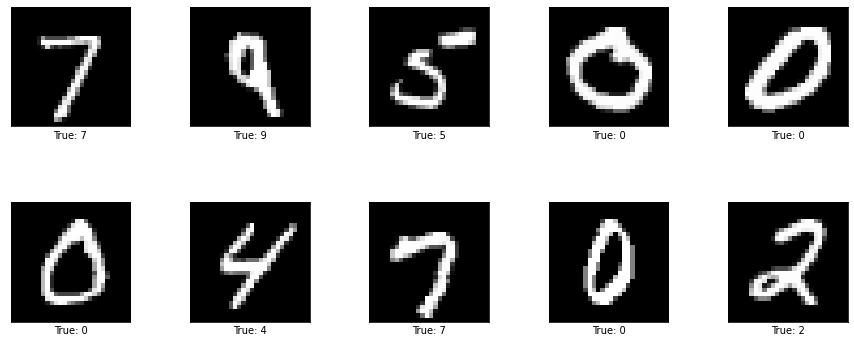

In [21]:
#把樣本印出來看看～～～～
import math
import random

num = 10
row = int(math.ceil(num/5))

fig, axes = plt.subplots(row, 5, figsize=(5*3, row*3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    r = random.randint(0, len(X_train) - 1)
    X_test_random = X_train[r:r+1]
    Y_test_random = Y_train[r:r+1]
    ax.imshow(X_test_random.reshape(28, 28), cmap="gray")
    ax.set_xlabel("True: {0}".format(np.argmax(Y_test_random, 1)[0]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [23]:
# 建模型
model=Sequential()
# 第一個卷積
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

# 第二個卷積
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

# 第三個卷積
model.add(Conv2D(64, (3,3),activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

# 展平
model.add(Flatten())

# 全連接層
model.add(Dense(256, activation='relu'))

#輸出層
model.add(Dense(10, activation='softmax'))

#看一下model的長相
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [24]:
# 選擇損失函數、最佳化方法及成效衡量方式
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [25]:
# 訓練模型～～～～
train_his = model.fit(X_train,Y_train, batch_size=64, epochs=13, validation_split = 0.2, verbose=2)

Epoch 1/13
368/368 - 26s - loss: 0.4746 - accuracy: 0.8510 - val_loss: 0.2776 - val_accuracy: 0.9498
Epoch 2/13
368/368 - 25s - loss: 0.1622 - accuracy: 0.9503 - val_loss: 0.1723 - val_accuracy: 0.9707
Epoch 3/13
368/368 - 25s - loss: 0.1224 - accuracy: 0.9613 - val_loss: 0.1616 - val_accuracy: 0.9682
Epoch 4/13
368/368 - 25s - loss: 0.0976 - accuracy: 0.9687 - val_loss: 0.1090 - val_accuracy: 0.9769
Epoch 5/13
368/368 - 25s - loss: 0.0863 - accuracy: 0.9713 - val_loss: 0.0967 - val_accuracy: 0.9818
Epoch 6/13
368/368 - 25s - loss: 0.0765 - accuracy: 0.9750 - val_loss: 0.0981 - val_accuracy: 0.9806
Epoch 7/13
368/368 - 24s - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.1094 - val_accuracy: 0.9787
Epoch 8/13
368/368 - 25s - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0771 - val_accuracy: 0.9823
Epoch 9/13
368/368 - 25s - loss: 0.0588 - accuracy: 0.9806 - val_loss: 0.0864 - val_accuracy: 0.9823
Epoch 10/13
368/368 - 25s - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0641 - val_accura

In [26]:
test_result = model.predict(test_set, verbose=1)

875/875 [==============================] - 8s 9ms/step


In [27]:
results = np.argmax(test_result,axis = 1)
results = pd.Series(results,name="Label")
image_ids=pd.Series(range(1,28001),name = "ImageId")
Submission = pd.concat([image_ids,results],axis = 1)
Submission.to_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_2/data/answer.csv", index=False)

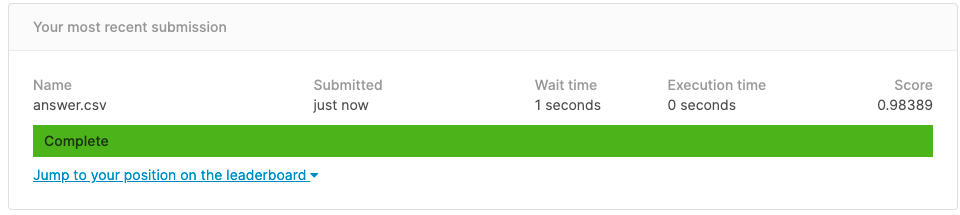  





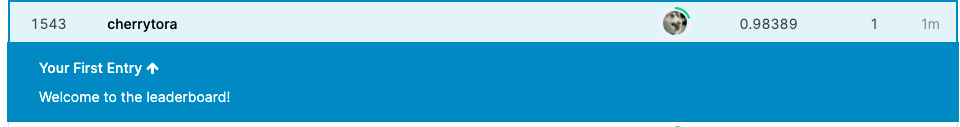

參考資料：   
https://ithelp.ithome.com.tw/articles/10221945  
https://ithelp.ithome.com.tw/articles/10191725